In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

balaji = pd.read_csv('Balaji Fast Food Sales.csv')
balaji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [43]:
balaji["transaction_type"] = (
    balaji["transaction_type"]
    .replace(r"^\s*$", pd.NA, regex=True)
    .fillna("Unknown")
)
balaji

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Unknown,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,Unknown,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,Unknown,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,Unknown,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,Unknown,Mrs.,Afternoon


In [44]:
balaji = balaji.rename(
    columns={"received_by": "gender"}
)

balaji["gender"] = balaji["gender"].replace({
    "Mr.": "M",
    "Mrs.": "F"
})
balaji

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,gender,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Unknown,M,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,M,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,M,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,M,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,M,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,Unknown,F,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,Unknown,M,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,Unknown,M,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,Unknown,F,Afternoon


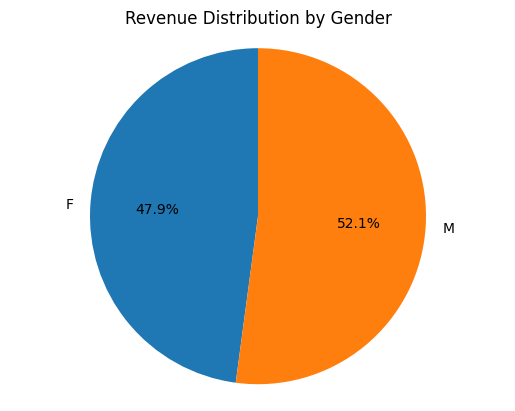

In [45]:
# Calculate total revenue per gender
gender_revenue = (
    balaji.groupby("gender")["transaction_amount"]
    .sum()
)

# Create a pie chart showing revenue distribution by gender
plt.figure()
plt.pie(
    gender_revenue.values,           # revenue values
    labels=gender_revenue.index,     # gender labels
    autopct="%1.1f%%",               # show percentage on the chart
    startangle=90                    # rotate the chart in 90 degrees for a better view
)

# Set the graph labels
plt.title("Revenue Distribution by Gender")
plt.axis("equal")   # Ensure the pie chart is a circle
plt.show()

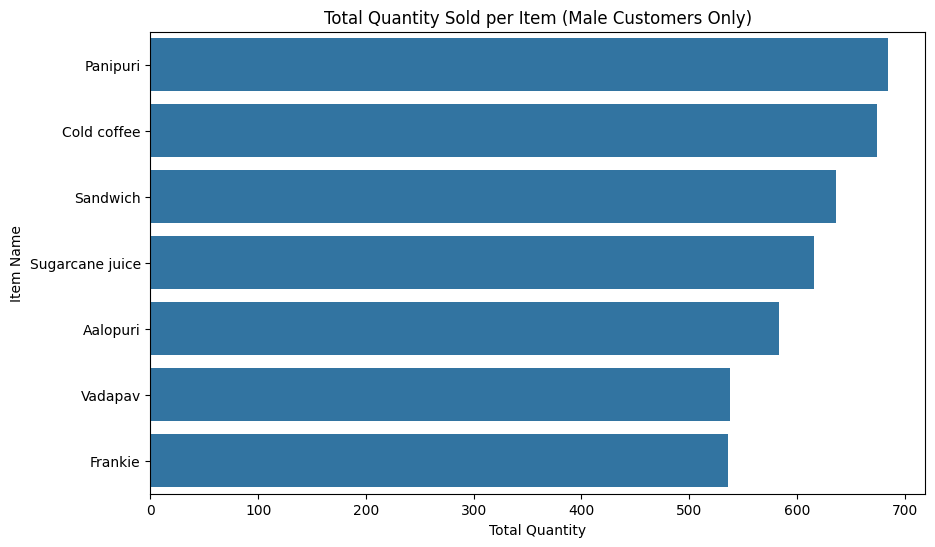

In [46]:
# Filter data for male customers only
balaji_M = balaji[balaji["gender"] == "M"]

# Calculate total quantity sold per item
item_quantity_M = (
    balaji_M.groupby("item_name")["quantity"]
    .sum()
    .reset_index()
    .sort_values(by="quantity", ascending=False)
)

# Create bar plot sorted by quantity
plt.figure(figsize=(10, 6))     # Set the graph size
sns.barplot(
    data=item_quantity_M,
    x="quantity",
    y="item_name"
)

plt.title("Total Quantity Sold per Item (Male Customers Only)")
plt.xlabel("Total Quantity")
plt.ylabel("Item Name")
plt.show()

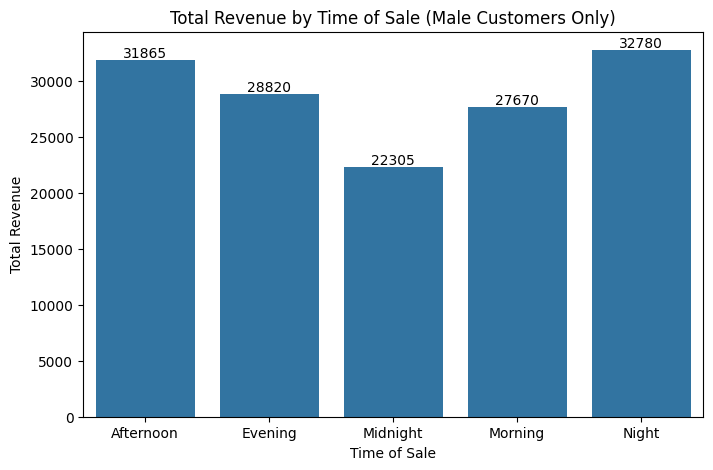

In [47]:
# Calculate total revenue per time of sale (M only)
time_revenue_M = (
    balaji_M.groupby("time_of_sale")["transaction_amount"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=time_revenue_M,
    x="time_of_sale",
    y="transaction_amount"
)

plt.title("Total Revenue by Time of Sale (Male Customers Only)")
plt.xlabel("Time of Sale")
plt.ylabel("Total Revenue")

# Add revenue value on top of each bar
for i, row in time_revenue_M.iterrows():
    ax.text(
        i,                                   # X-position: index of the bar on the x-axis
        row["transaction_amount"],           # Y-position: height of the bar (total revenue)
        f'{row["transaction_amount"]:.0f}',  # Text shown on the plot (sum revenue)
        ha="center",                         # Horizontally center the text over the bar
        va="bottom"                          # Place the text just above the bar
    )

plt.show()

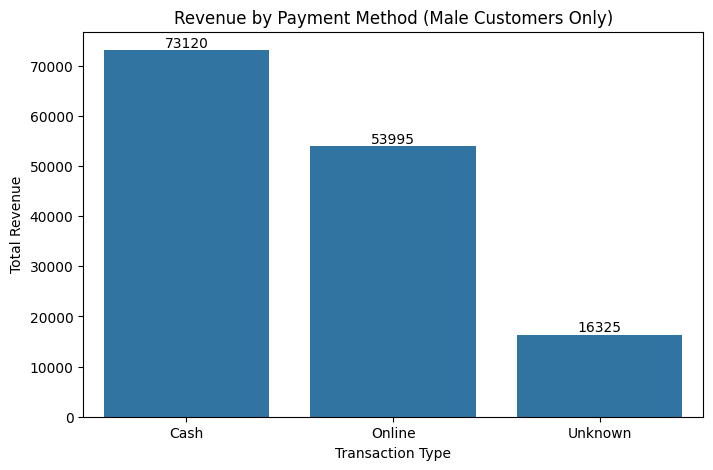

In [48]:
# Calculate total revenue per transaction type (M only)
payment_revenue_M = (
    balaji_M.groupby("transaction_type")["transaction_amount"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(8, 5))      # Set the graph size
ax = sns.barplot(
    data=payment_revenue_M,
    x="transaction_type",
    y="transaction_amount"
)

plt.title("Revenue by Payment Method (Male Customers Only)")
plt.xlabel("Transaction Type")
plt.ylabel("Total Revenue")

# Add revenue value on top of each bar
for i, row in payment_revenue_M.iterrows():
    ax.text(
        i,
        row["transaction_amount"],
        f'{row["transaction_amount"]:.0f}',
        ha="center",
        va="bottom"
    )

plt.show()